# Markov decision processes

In the previous chapter with bandits, every time we made an action the environment did not change. In this chapter we will consider environments where the state of the world changes after we make an action. We will call these environments Markov decision processes (MDPs). We will also consider the problem of finding the best policy for an MDP, which is called the policy optimization problem.

![](media/chapter-3/MDP-schema.png)

The above figure shows the schema of a genral RL process: 

* An agent makes and action 

* The action perturbs the environment and the environment returns a reward and a new state

* The agent uses the reward and the new state to update its policy

* The cycle continues. 

Compared to the k - bandit examples, in MDP scenarios, each taken action alters the state of the environment that the agent operates in. The sequance of any MDP is: 

$$S_{0}, A_{0}, R_{1}, S_{1}, A_{1}, R_{2}, ...$$

In an MDP, we can define three sets: 

$\mathbb{S}$ - the set of all possible states 

$\mathbb{A}$ - the set of all possible actions

$\mathbb{R}$ - the set of all possible rewards

Then, the dynamics of an MDP process can be defined as a probability: 

$p(s^{*}, r| s, a) = P(S_{t} = s^{*}, R_{t} = r | S_{t-1} = s, A_{t-1}=a)$

$S_{t} \in \mathbb{S}, R_{t} \in \mathbb{R}, A_{t} \in \mathbb{A}$  $\forall t$

Because we are dealing with probabilities, then: 

$$ \sum_{s^{*} \in \mathbb{S}} \sum_{r \in \mathbb{R}} p(s^{*}, r| s, a) = 1 $$



# Returns and rewards

The reward hypothesis states that: 

> The goal of an agent is to maximize the expected total reward it receives over the course of its lifetime.

The expected return at time step $t$ is denoted as: 

$$G_{t} = R_{t+1} + R_{t+2} + ... + R_{T}$$ 

Where $T$ is the terminal time step when the episode ends. 

When there is no clear ending to the episode, the return is defined as:

$$G_{t} = R_{t+1} + \gamma R_{t+2} + \gamma^{2} R_{t+3} + ...$$

Where $\gamma \in [0, 1]$ is a discount factor.

# Policies and value functions 

A policy is a mapping (denoted as $\pi$) from states to probabilities of taking a certain action.

$$ \pi : \mathbb{S} \rightarrow \mathbb{A}$$ 

Or 

$$ \pi(a \in \mathbb{A}| s \in \mathbb{S}) \in [0, 1] $$

The value function of a state $s$ under a policy $\pi$, denoted $v_{\pi}(s)$, is the expected return
when starting in s and following $\pi$ thereafter. The full definition is: 

$$ v_{\pi} (s) = \mathbb{E}_{\pi} \left[ G_{t} | S_{t} = s\right] =  \mathbb{E}_{\pi} \left[\sum_{k = 0}^{\infty}R_{t + k + 1} \gamma^{k} | S_{t} = s\right]$$

The action value function, which assigns a value to taking an action $a$ in a state $s$ under a policy $\pi$, is denoted $q_{\pi}(s, a)$. The full definition is:

$$ q_{\pi} (s, a) = \mathbb{E}_{\pi} \left[ G_{t} | S_{t} = s, A_{t} = a\right] =  \mathbb{E}_{\pi} \left[\sum_{k = 0}^{\infty}R_{t + k + 1} \gamma^{k} | S_{t} = s, A_{t} = a\right]$$

The Bellman equation for state value function is: 

$$ v_{\pi}(s) = \sum_{a \in \mathbb{A}} \pi(a|s) \sum_{s^{*} \in \mathbb{S}} \sum_{r \in \mathbb{R}} p(s^{*}, r| s, a) \left[ r + \gamma v_{\pi}(s^{*}) \right] $$

Here 

$s^{*}$ - the next state from the current state $s$. 

The equation states that the value of a state is the `sum of the expected return of all possible actions taken in that state`. The Belman equation also has a recursive property. 

## Belman's optimiality equations 

The Bellman optimality equation for the state value function is, as expressed from the action perspective:

$$ v_{*}(s) = \max_{a \in \mathbb{A}} \sum_{s^{*} \in \mathbb{S}} \sum_{r \in \mathbb{R}} p(s^{*}, r| s, a) \left[ r + \gamma v_{*}(s^{*}) \right] $$

In terms of the action value function, the Bellman optimality equation is:

$$ q_{*}(s, a) = \sum_{s^{*} \in \mathbb{S}} \sum_{r \in \mathbb{R}} p(s^{*}, r| s, a) \left[ r + \gamma \max_{a^{*} \in \mathbb{A}} q_{*}(s^{*}, a^{*}) \right] $$

In both equations, we want to find the best action for a given state. The actions which maximize both $v_{*}(s)$ and $q_{*}(s, a)$ are called optimal actions. 

# Dynamic programming for solving MDPs

Dynamic programming is a method for solving MDPs. It is based on the Bellman optimality equations. 

The update rule for the state value function is:

$$ v_{k+1}(s) = \max_{a \in \mathbb{A}} \sum_{s^{*} \in \mathbb{S}} \sum_{r \in \mathbb{R}} p(s^{*}, r| s, a) \left[ r + \gamma v_{k}(s^{*}) \right] $$

The update rule for the action value function is:

$$ q_{k+1}(s, a) = \sum_{s^{*} \in \mathbb{S}} \sum_{r \in \mathbb{R}} p(s^{*}, r| s, a) \left[ r + \gamma \max_{a^{*} \in \mathbb{A}} q_{k}(s^{*}, a^{*}) \right] $$

Let us solve a frozen lake problem using dynamic programming.

## Frozen lake problem

Imagine that our agent can move on a 5 x 5 grid. The goal is to move from the starting position to the goal. The agent can move on blocks of ice, but if it moves on a hole, it will fall into the water and the episode will end. 

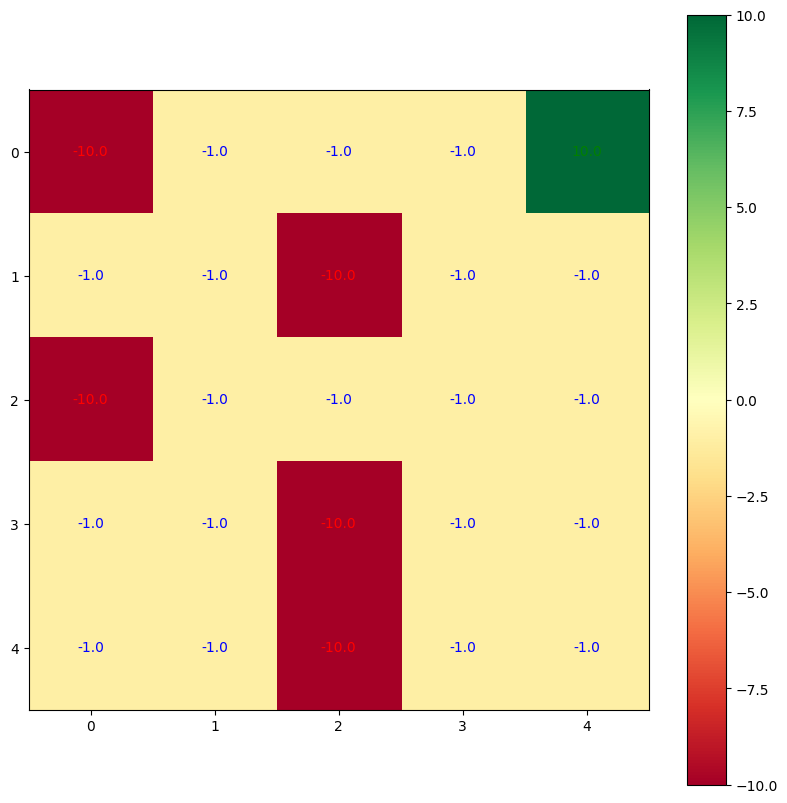

In [33]:
# Importing the needed packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Defining the number of blocks of a n x n grid 
n = 5 

# Initiating an empty dataframe of size n x n
df = pd.DataFrame(np.zeros((n,n)))

# The bottom left corner is the starting position; 
# The top right corner is the goal position 
# On each line of the frozen lake, we will randomly generate one hole 
# Each block's reward is -1 except for the goal block which is 10. The hole blocks are -10. 
df.loc[n - 1, 0] = -1 # starting position
df.loc[0, n - 1] = 10 # goal position
for i in range(0, n):
    if i == n - 1:
        # At the last row, the hole cannot be starting position 
        df.loc[i, np.random.randint(1, n - 1)] = -10
    elif i == 0:
        # At the first row, the hole cannot be goal position 
        df.loc[i, np.random.randint(0, n - 2)] = -10
    else:
        df.loc[i, np.random.randint(0, n - 1)] = -10 # hole position

# All the 0 blocks are converted to -1 
df[df == 0] = -1

# Defining the coloring dictionary for each of the blocks
color_dict = {-1: 'blue', -10: 'red', 10: 'green'}

# Ploting the dataframe
plt.figure(figsize = (10, 10))
plt.imshow(df, cmap = plt.cm.RdYlGn)
plt.colorbar()
plt.xticks(np.arange(0, n, 1))
plt.yticks(np.arange(0, n, 1))
for i in range(n):
    for j in range(n):
        plt.text(j, i, df.loc[i, j], ha = 'center', va = 'center', color = color_dict[df.loc[i, j]])
plt.show()
